In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import pylab
import os
import json
import math
import pickle

## Figure 2

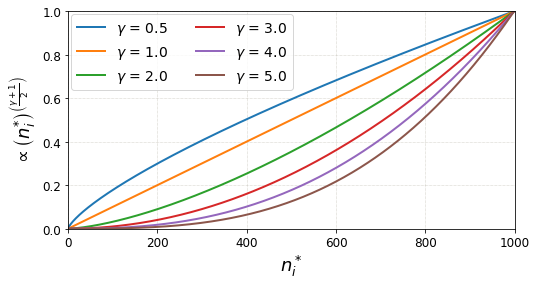

In [2]:
fig, ax = plt.subplots(figsize=(8,4))

n = [i for i in range(1000)]
gamma = [0.5,1,2,3,4,5]

for i in range(len(gamma)):
#     r = gamma[i] / (gamma[i] + 1.0)
    r = (1 + gamma[i]) / 2.0
    y = [(math.pow(j, r) / math.pow(n[-1], r)) for j in n]
    plt.plot(n, y, linewidth=2, label='$\gamma$ = {:.1f}'.format(gamma[i]))

leg = plt.legend(loc=0, borderaxespad=0.2, ncol=2, prop={'size':14})
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlim([0.0, 1000])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel(r'$n_i^*$', fontsize=18)
ax.set_ylabel(r'$\propto \left(n_{i}^{*}\right)^{\left(\frac{\gamma + 1}{2}\right)}$', fontsize=18)
plt.savefig('power-law.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

## Figure 3

In [3]:
with open('dataset/amazon_item_ct.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    amazon_item_ct = u.load()
with open('dataset/citeulike_item_ct.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    citeulike_item_ct = u.load()
with open('dataset/tradesy_item_ct.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tradesy_item_ct = u.load()
print(len(amazon_item_ct))
print(len(citeulike_item_ct))
print(len(tradesy_item_ct))

amazon = []
for k in amazon_item_ct:
    amazon.append(amazon_item_ct[k])
citeulike = []
for k in citeulike_item_ct:
    citeulike.append(citeulike_item_ct[k])
tradesy = []
for k in tradesy_item_ct:
    tradesy.append(tradesy_item_ct[k])

355397
16874
135053


64


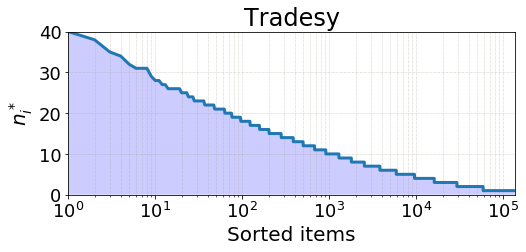

In [4]:
fig, ax = plt.subplots(figsize=(8,3))
p_outlier = 0.0001
x = [i+1 for i in range(len(tradesy))]
y = sorted(tradesy)[::-1]
idx = set()
for i in range(len(y)):
    if i == 0 or i == len(y) - 1:
        idx.add(i)
    elif y[i] != y[i-1]:
        idx.add(i-1)
        idx.add(i)
idx = sorted(list(idx))
print(len(idx))
x = [x[i] for i in idx]
y = [y[i] for i in idx]
plt.plot(x, y, linewidth=3)
ax.fill_between(x, y, facecolor='b', alpha=0.2)
# plt.axvline(x=np.round(len(tradesy)*p_outlier), color='#E74C3C', linestyle='--', linewidth=2)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0.0, len(tradesy)])
ax.set_ylim([0.0, max(tradesy)])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
ax.set_xlabel('Sorted items', fontsize=20)
ax.set_ylabel(r'$n_i^*$', fontsize=20)
ax.set_title('Tradesy', fontsize=24)
plt.savefig('tradesy.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

262


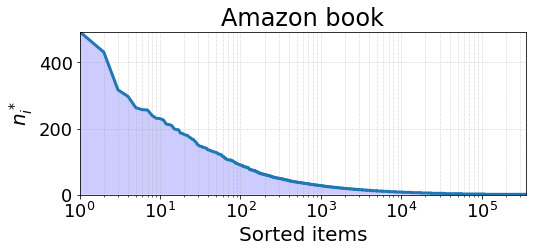

In [5]:
fig, ax = plt.subplots(figsize=(8,3))
p_outlier = 0.0001
x = [i+1 for i in range(len(amazon))]
y = sorted(amazon)[::-1]
idx = set()
for i in range(len(y)):
    if i == 0 or i == len(y) - 1:
        idx.add(i)
    elif y[i] != y[i-1]:
        idx.add(i-1)
        idx.add(i)
idx = sorted(list(idx))
print(len(idx))
x = [x[i] for i in idx]
y = [y[i] for i in idx]
plt.plot(x, y, linewidth=3)
ax.fill_between(x, y, facecolor='b', alpha=0.2)
# plt.axvline(x=np.round(len(amazon)*p_outlier), color='#E74C3C', linestyle='--', linewidth=2)
plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0, len(amazon)])
ax.set_ylim([-0.1, max(amazon)])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
ax.set_xlabel('Sorted items', fontsize=20)
ax.set_ylabel(r'$n_i^*$', fontsize=20)
ax.set_title('Amazon book', fontsize=24)
plt.savefig('amazon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

167


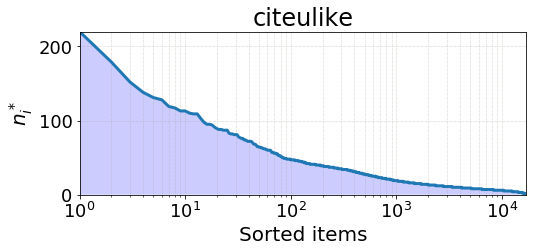

In [6]:
fig, ax = plt.subplots(figsize=(8,3))
p_outlier = 0.0001
x = [i+1 for i in range(len(citeulike))]
y = sorted(citeulike)[::-1]
idx = set()
for i in range(len(y)):
    if i == 0 or i == len(y) - 1:
        idx.add(i)
    elif y[i] != y[i-1]:
        idx.add(i-1)
        idx.add(i)
idx = sorted(list(idx))
print(len(idx))
x = [x[i] for i in idx]
y = [y[i] for i in idx]
plt.plot(x, y, linewidth=3)
ax.fill_between(x, y, facecolor='b', alpha=0.2)
# plt.axvline(x=np.round(len(citeulike)*p_outlier), color='#E74C3C', linestyle='--', linewidth=2)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0.0, len(citeulike)])
ax.set_ylim([0.0, max(citeulike)])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
ax.set_xlabel('Sorted items', fontsize=20)
ax.set_ylabel(r'$n_i^*$', fontsize=20)
ax.set_title('citeulike', fontsize=24)
plt.savefig('citeulike.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

## Figure 4

In [7]:
with open('Top 50 results/bpr-citeulike-top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    citeulike_bpr = u.load()
with open('Top 50 results/full-eval-cml-citeulike_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    citeulike_cml = u.load()
with open('Top 50 results/ncml-citeulike-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    citeulike_ncml = u.load()
with open('Top 50 results/pmf-citeulike-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    citeulike_pmf = u.load()

with open('Top 50 results/bpr-tradesy-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tradesy_bpr = u.load()
with open('Top 50 results/full-eval-cml-tradesy_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tradesy_cml = u.load()
with open('Top 50 results/full-eval-ncml-tradesy_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tradesy_ncml = u.load()
with open('Top 50 results/latest-pmf-tradesy-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    tradesy_pmf = u.load()

with open('Top 50 results/bpr-amazon-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    amazon_bpr = u.load()
with open('Top 50 results/full-eval-cml-amazon_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    amazon_cml = u.load()
with open('Top 50 results/full-eval-ncml-amazon_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    amazon_ncml = u.load()
with open('Top 50 results/gmf-amazon-test_evaluate_full_top50.pickle', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    amazon_pmf = u.load()

In [8]:
def get_presentation_bias(dataset, item_ct, top50_rec):
    num_items = {}
    presentation_bias = {}
    for i in range(len(dataset)):
        if dataset[i] in num_items:
            num_items[dataset[i]] += 1
        else:
            num_items[dataset[i]] = 1
    for i in top50_rec:
        for j in range(50):
            idx = top50_rec[i][j]
            if idx == 16979:
                idx = 16978
            if idx in item_ct:
                if item_ct[idx] in presentation_bias:
                    presentation_bias[item_ct[idx]] += 1
                else:
                    presentation_bias[item_ct[idx]] = 1
            else:
                print(idx)
    x = []
    y = []
    for k in presentation_bias:
        presentation_bias[k] /= num_items[k]
        x.append(k)
        y.append(presentation_bias[k])
    sort_index = np.argsort(x)
    x = [x[i] for i in sort_index]
    y = [y[i] for i in sort_index]
    return x, y

In [9]:
citeulike_bpr_x, citeulike_bpr_y = get_presentation_bias(citeulike, citeulike_item_ct, citeulike_bpr)
citeulike_cml_x, citeulike_cml_y = get_presentation_bias(citeulike, citeulike_item_ct, citeulike_cml)
citeulike_ncml_x, citeulike_ncml_y = get_presentation_bias(citeulike, citeulike_item_ct, citeulike_ncml)
citeulike_pmf_x, citeulike_pmf_y = get_presentation_bias(citeulike, citeulike_item_ct, citeulike_pmf)

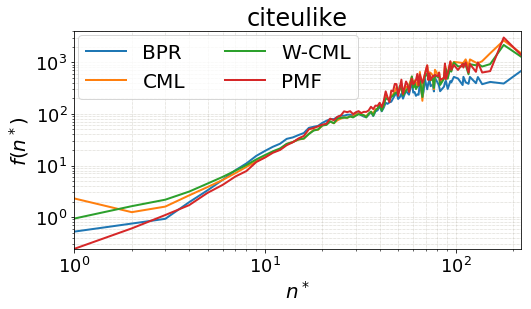

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(citeulike_bpr_x, citeulike_bpr_y, linewidth=2, label='BPR')
plt.plot(citeulike_cml_x, citeulike_cml_y, linewidth=2, label='CML')
plt.plot(citeulike_ncml_x, citeulike_ncml_y, linewidth=2, label='W-CML')
plt.plot(citeulike_pmf_x, citeulike_pmf_y, linewidth=2, label='PMF')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0.0, max(citeulike_bpr_x)])
ax.set_ylim([0.0, 4000])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
leg = plt.legend(loc=0, borderaxespad=0.2, ncol=2, prop={'size':20})
ax.set_xlabel(r'$n^*$', fontsize=20)
ax.set_ylabel(r'$f(n^*)$', fontsize=20)
ax.set_title('citeulike', fontsize=24)
plt.savefig('citeulike_fn.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

In [11]:
tradesy_bpr_x, tradesy_bpr_y = get_presentation_bias(tradesy, tradesy_item_ct, tradesy_bpr)
tradesy_cml_x, tradesy_cml_y = get_presentation_bias(tradesy, tradesy_item_ct, tradesy_cml)
tradesy_ncml_x, tradesy_ncml_y = get_presentation_bias(tradesy, tradesy_item_ct, tradesy_ncml)
tradesy_pmf_x, tradesy_pmf_y = get_presentation_bias(tradesy, tradesy_item_ct, tradesy_pmf)

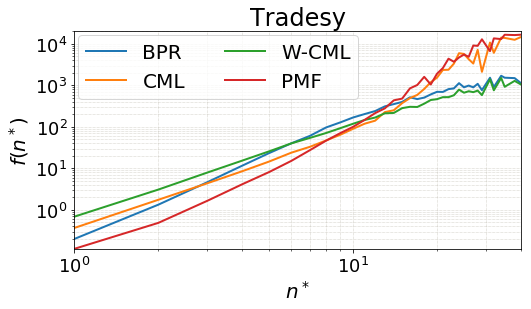

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(tradesy_bpr_x, tradesy_bpr_y, linewidth=2, label='BPR')
plt.plot(tradesy_cml_x, tradesy_cml_y, linewidth=2, label='CML')
plt.plot(tradesy_ncml_x, tradesy_ncml_y, linewidth=2, label='W-CML')
plt.plot(tradesy_pmf_x, tradesy_pmf_y, linewidth=2, label='PMF')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0.0, max(tradesy_bpr_x)])
ax.set_ylim([0.0, 20000])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
leg = plt.legend(loc=0, borderaxespad=0.2, ncol=2, prop={'size':20})
ax.set_xlabel(r'$n^*$', fontsize=20)
ax.set_ylabel(r'$f(n^*)$', fontsize=20)
ax.set_title('Tradesy', fontsize=24)
plt.savefig('tradesy_fn.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

In [13]:
amazon_bpr_x, amazon_bpr_y = get_presentation_bias(amazon, amazon_item_ct, amazon_bpr)
amazon_cml_x, amazon_cml_y = get_presentation_bias(amazon, amazon_item_ct, amazon_cml)
amazon_ncml_x, amazon_ncml_y = get_presentation_bias(amazon, amazon_item_ct, amazon_ncml)
amazon_pmf_x, amazon_pmf_y = get_presentation_bias(amazon, amazon_item_ct, amazon_pmf)

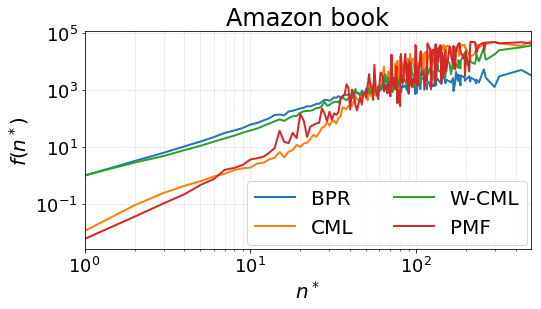

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(amazon_bpr_x, amazon_bpr_y, linewidth=2, label='BPR')
plt.plot(amazon_cml_x, amazon_cml_y, linewidth=2, label='CML')
plt.plot(amazon_ncml_x, amazon_ncml_y, linewidth=2, label='W-CML')
plt.plot(amazon_pmf_x, amazon_pmf_y, linewidth=2, label='PMF')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlim([0.0, max(amazon_bpr_x)])
# ax.set_ylim([0.0, 20000])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
leg = plt.legend(loc=0, borderaxespad=0.2, ncol=2, prop={'size':20})
ax.set_xlabel(r'$n^*$', fontsize=20)
ax.set_ylabel(r'$f(n^*)$', fontsize=20)
ax.set_title('Amazon book', fontsize=24)
plt.savefig('amazon_fn.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)

## Figure 5

In [15]:
citeulike_auc = [
[0.94288021,0.92128865,0.92041306,0.91922377],
[0.93506830,0.91093130,0.90997242,0.90867391],
[0.93660380,0.91078610,0.90977339,0.90840100],
[0.92948823,0.89809732,0.89684315,0.89514220]]
citeulike_auc = np.array(citeulike_auc, dtype=np.float32)

citeulike_recall = [
[0.54939729,0.44612853,0.44247554,0.43757445],
[0.51443184,0.40423244,0.40050186,0.39551391],
[0.54759183,0.44640954,0.44301429,0.43847623],
[0.55925726,0.45987255,0.45653503,0.45207605]]
citeulike_recall = np.array(citeulike_recall, dtype=np.float32)

citeulike_dcg = [
[0.48761121,0.41977438,0.41751747,0.41450333],
[0.46925830,0.39877319,0.39654339,0.39357571],
[0.48655677,0.41987257,0.41776997,0.41497242],
[0.49300305,0.42855478,0.42651643,0.42380525]]
citeulike_dcg = np.array(citeulike_dcg, dtype=np.float32)

citeulike_dcg5 = [
[0.37162036,0.28173705,0.27874503,0.27474978],
[0.34693619,0.25338215,0.25042829,0.24649898],
[0.37317996,0.28628399,0.28355204,0.27991913],
[0.38222365,0.29947004,0.29687048,0.29341628]]
citeulike_dcg5 = np.array(citeulike_dcg5, dtype=np.float32)

# 
tradesy_auc = [
[0.82314437,0.79454766,0.79261368,0.79119661],
[0.83152153,0.79751128,0.79519383,0.79349505],
[0.77492470,0.73930920,0.73701957,0.73535903],
[0.72813200,0.68116300,0.67795000,0.67559200]]
tradesy_auc = np.array(tradesy_auc, dtype=np.float32)

tradesy_recall = [
[0.41689808,0.33471046,0.32969047,0.32607809],
[0.34300026,0.26530175,0.26070837,0.25742203],
[0.34631558,0.28163363,0.27784269,0.27512586],
[0.27854048,0.22073030,0.21728105,0.21480393]]
tradesy_recall = np.array(tradesy_recall, dtype=np.float32)

tradesy_dcg = [
[0.42892863,0.37535102,0.37216152,0.36986743],
[0.38578640,0.33486215,0.33192086,0.32981463],
[0.38208768,0.33913576,0.33668208,0.33492579],
[0.34022850,0.30080902,0.29846570,0.29678125]]
tradesy_dcg = np.array(tradesy_dcg, dtype=np.float32)

tradesy_dcg5 = [
[0.30013607,0.23318766,0.22925681,0.22643786],
[0.24796002,0.18536135,0.18181516,0.17928649],
[0.25095280,0.19852487,0.19556154,0.19344422],
[0.20220752,0.15652642,0.15387637,0.15198024]]
tradesy_dcg5 = np.array(tradesy_dcg5, dtype=np.float32)

# 
amazon_auc = [
[0.7909869825,0.7642633844,0.7635509636,0.7626521148],
[0.7938161294,0.7697593615,0.7691540243,0.768393412],
[0.7784079372,0.7470371778,0.7462347125,0.745226302],
[0.755057792,0.7168136,0.7157498,0.7144016002]]
amazon_auc = np.array(amazon_auc, dtype=np.float32)

amazon_recall = [
[0.4487605331,0.3791391741,0.3774507866,0.3753453374],
[0.3703200388,0.3115988201,0.3102307671,0.3085270046],
[0.415332583,0.3475232819,0.3460104181,0.3441353755],
[0.36393949,0.30033179,0.29884732,0.296997238]]
amazon_recall = np.array(amazon_recall, dtype=np.float32)

amazon_dcg = [
[0.4581024203,0.4113033169,0.4102239356,0.4088801392],
[0.4128829117,0.3721092021,0.3712172676,0.3701095314],
[0.4272257032,0.3793231254,0.3783339024,0.3771117571],
[0.404229262,0.36020993,0.35923055,0.358011806]]
amazon_dcg = np.array(amazon_dcg, dtype=np.float32)

amazon_dcg5 = [
[0.3407806643,0.281309809,0.2799524579,0.2782661246],
[0.2864138557,0.2356101333,0.2345046708,0.2331336897],
[0.3126095736,0.2531298148,0.2519121298,0.250410962],
[0.2785541148,0.2251949809,0.2240368329,0.2226003037]]
amazon_dcg5 = np.array(amazon_dcg5, dtype=np.float32)

In [16]:
def draw_eval(data, name, metric, gamma, ax):
    labels = ['BPR','PMF','CML','W-CML']
    markers = ['-s', '-o', '-v', '-x', '-^']
    for i in [0,2,3,1]:
        ax.plot(data[i,:], markers[i], label=labels[i], linewidth=2, markersize=10, mew=2, fillstyle='none')
    leg = ax.legend(loc=0, borderaxespad=0.2, ncol=2, prop={'size':18})
    ax.set_xticklabels(['AOA', r'$\gamma$ (min) = ' + gamma[0], r'$\gamma$ (avg.) = ' + gamma[1], r'$\gamma$ (max) = ' + gamma[2]])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_ylabel(metric, fontsize=20)
    ax.set_title(name, fontsize=24)

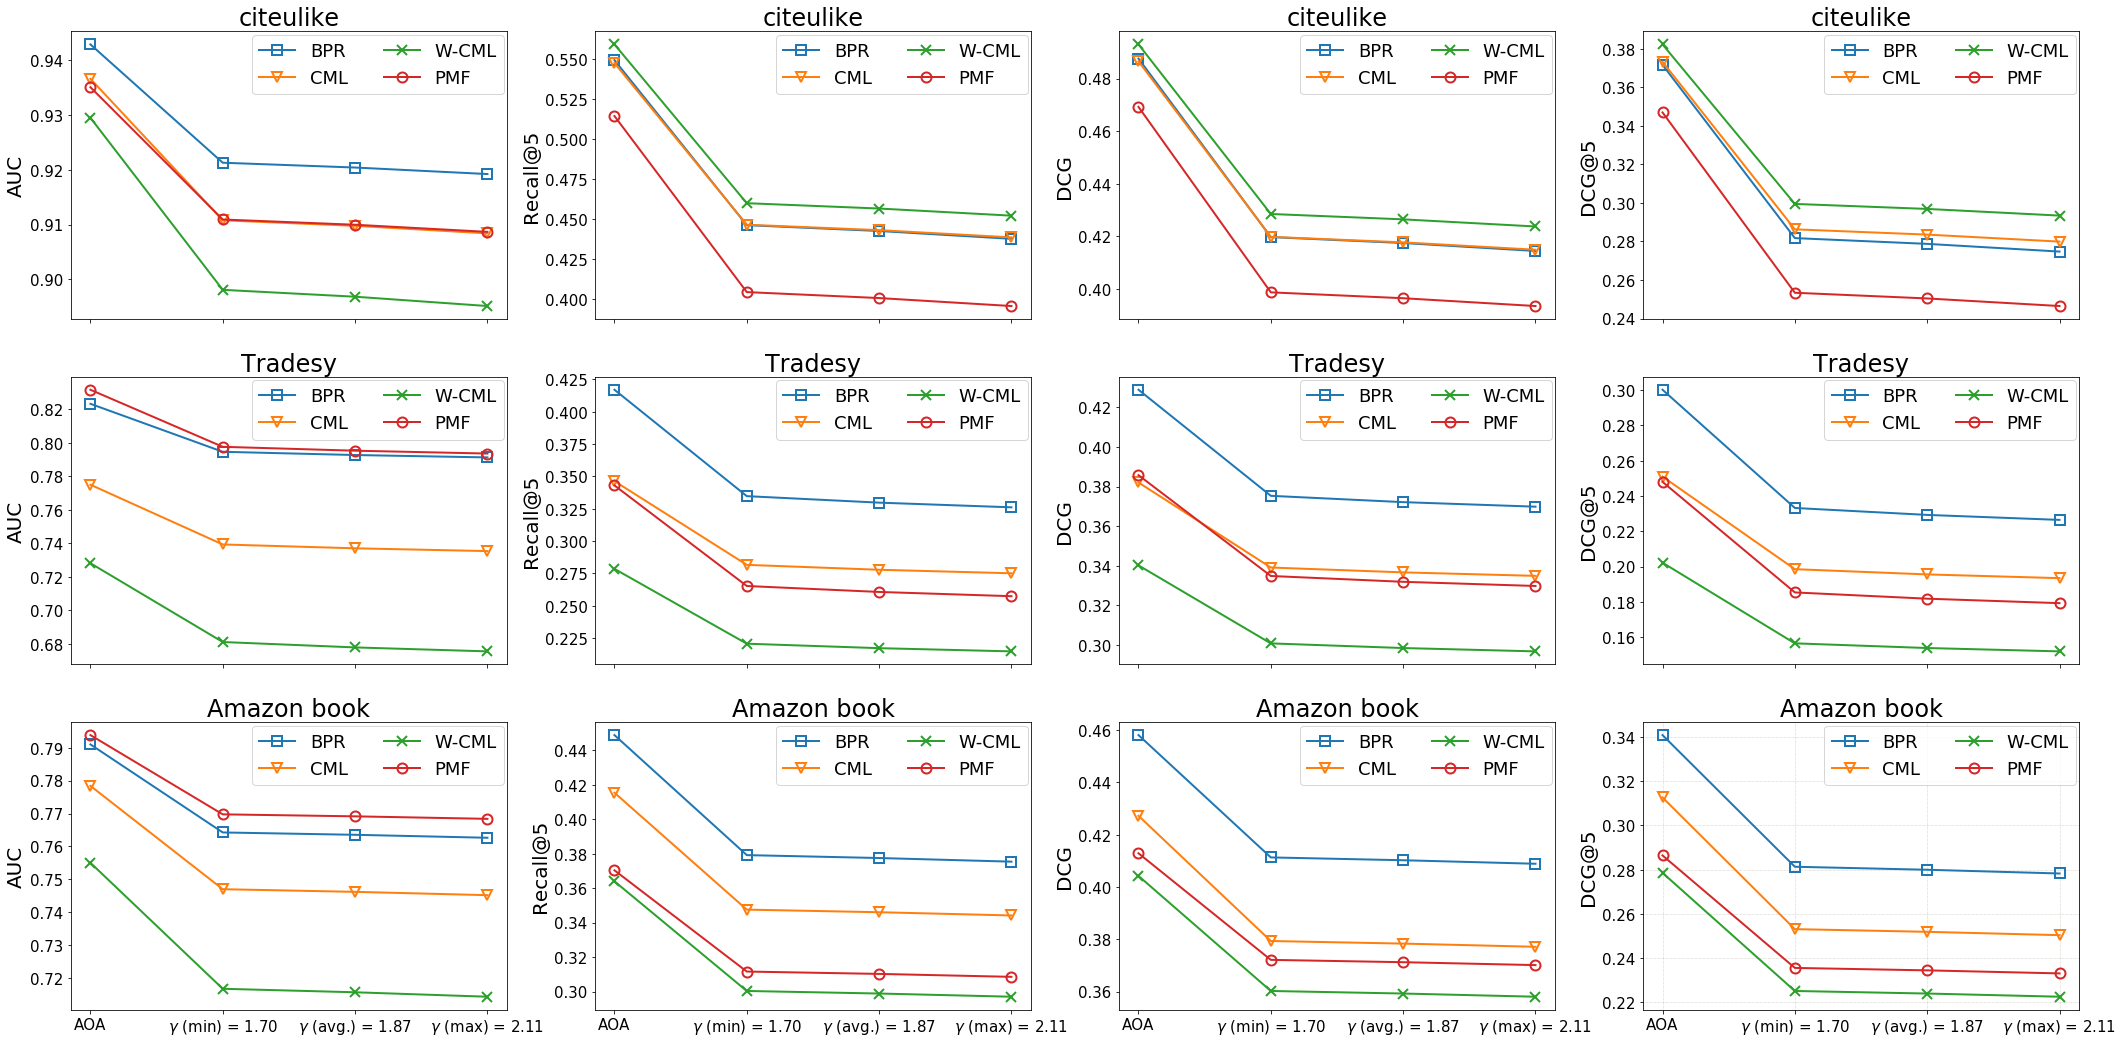

In [17]:
fig, ax = plt.subplots(figsize=(9*4,6*3), nrows=3, ncols=4, sharex=True)

gamma_citeulike = ['1.55', '1.69', '1.89']
draw_eval(citeulike_auc, 'citeulike', 'AUC', gamma_citeulike, ax[0,0])
draw_eval(citeulike_recall, 'citeulike', 'Recall@5', gamma_citeulike, ax[0,1])
draw_eval(citeulike_dcg, 'citeulike', 'DCG', gamma_citeulike, ax[0,2])
draw_eval(citeulike_dcg5, 'citeulike', 'DCG@5', gamma_citeulike, ax[0,3])

gamma_tradesy = ['2.25', '2.69', '3.07']
draw_eval(tradesy_auc, 'Tradesy', 'AUC', gamma_tradesy, ax[1,0])
draw_eval(tradesy_recall, 'Tradesy', 'Recall@5', gamma_tradesy, ax[1,1])
draw_eval(tradesy_dcg, 'Tradesy', 'DCG', gamma_tradesy, ax[1,2])
draw_eval(tradesy_dcg5, 'Tradesy', 'DCG@5', gamma_tradesy, ax[1,3])

gamma_amazon = ['1.70', '1.87', '2.11']
draw_eval(amazon_auc, 'Amazon book', 'AUC', gamma_amazon, ax[2,0])
draw_eval(amazon_recall, 'Amazon book', 'Recall@5', gamma_amazon, ax[2,1])
draw_eval(amazon_dcg, 'Amazon book', 'DCG', gamma_amazon, ax[2,2])
draw_eval(amazon_dcg5, 'Amazon book', 'DCG@5', gamma_amazon, ax[2,3])

plt.xticks([0, 1, 2, 3])
plt.gca().grid(which='both', linestyle=':', linewidth='0.5', color='#a8a495')
plt.savefig('evaluation.pdf', transparent=True, bbox_inches='tight', pad_inches=0.05)